# Monte Carlo simulation for 60-40 portfolio

# Nuova sezione

In [ ]:
from google.colab import files
files.download("hist_60_40.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Simple 60/40 Monte Carlo (annual returns, normal approx)
N sims: 100000
Mean annual return: 5.62%
Std dev (annual):   9.46%

95% VaR (loss): 9.84%   (i.e. 5% worst-case loss ≥ 9.84%)
95% ES:         13.77%
99% VaR (loss): 16.14%
99% ES:         19.40%


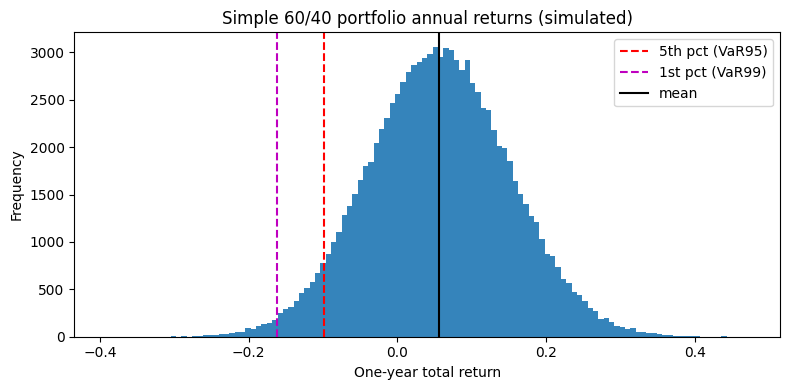

In [ ]:
# simple_60_40_colab.py  (paste this into a Colab/Jupyter cell)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# ---------- SETTINGS (easy to edit) ----------
EQ_MEAN = 0.08    # equity expected annual return (8%)
EQ_VOL  = 0.15    # equity annual vol (15%)

BND_MEAN = 0.02   # bond expected annual return (2%)
BND_VOL  = 0.04   # bond annual vol (4%)

CORR = 0.20       # correlation equity-bond
W_EQ = 0.60       # 60% equities
W_BND = 0.40      # 40% bonds

N_SIMS = 100_000  # number of simulated years (reduce to 20_000 if it's slow)
SEED = 2025

# ---------- SIMULATE ----------
rng = np.random.default_rng(SEED)
means = np.array([EQ_MEAN, BND_MEAN])
cov = np.array([
    [EQ_VOL**2, CORR * EQ_VOL * BND_VOL],
    [CORR * EQ_VOL * BND_VOL, BND_VOL**2]
])

draws = rng.multivariate_normal(means, cov, size=N_SIMS)  # (N_SIMS, 2)
r_eq = draws[:,0]
r_b  = draws[:,1]

# portfolio simple return (one-year)
r_port = W_EQ * r_eq + W_BND * r_b

# ---------- METRICS ----------
mean_r = r_port.mean()
std_r = r_port.std(ddof=1)

def var_es(returns, alpha):
    q = np.percentile(returns, (1-alpha)*100)   # e.g. alpha=0.95 -> 5th percentile
    var = -q
    losses = -returns
    tail = losses[losses >= var]
    es = tail.mean() if len(tail)>0 else np.nan
    return var, es, q

var95, es95, q95 = var_es(r_port, 0.95)
var99, es99, q99 = var_es(r_port, 0.99)

# ---------- PRINT ----------
print("Simple 60/40 Monte Carlo (annual returns, normal approx)")
print(f"N sims: {N_SIMS}")
print(f"Mean annual return: {mean_r:.2%}")
print(f"Std dev (annual):   {std_r:.2%}")
print()
print(f"95% VaR (loss): {var95:.2%}   (i.e. 5% worst-case loss ≥ {var95:.2%})")
print(f"95% ES:         {es95:.2%}")
print(f"99% VaR (loss): {var99:.2%}")
print(f"99% ES:         {es99:.2%}")

# ---------- PLOT ----------
plt.figure(figsize=(8,4))
plt.hist(r_port, bins=120, alpha=0.9)
plt.axvline(q95, color='r', linestyle='--', label='5th pct (VaR95)')
plt.axvline(q99, color='m', linestyle='--', label='1st pct (VaR99)')
plt.axvline(mean_r, color='k', linestyle='-', label='mean')
plt.xlabel('One-year total return')
plt.ylabel('Frequency')
plt.title('Simple 60/40 portfolio annual returns (simulated)')
plt.legend()
plt.tight_layout()
plt.savefig('hist_60_40.png', dpi=150)   # saves a PNG in Colab file system (you can download)
plt.show()
